 # Comparison of Activities Between Weekdays and Weekends Across Genders

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DailyActivitiesPreProcessed.csv')
df 

,Gender,Age,Occupation,Marital status,HouseHoldIncome,Weekday_05:00-05:30,Weekday_05:30-06:00,Weekday_06:00-06:30,Weekday_06:30-07:00,Weekday_07:00-07:30,...,Weekday_Breakfast_time,Weekend_Breakfast_time,Weekday_Lunch_time,Weekend_Lunch_time,Weekday_Dinner_time,Weekend_Dinner_time,Productivity_score_weekday,Productivity_score_weekend,Activity_Level_weekday,Activity_Level_weekend
0,Female,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,08:30-09:00,NaN,NaN,NaN,18:00-18:30,23:00-23:30,0.437500,0.270833,Moderate,Moderate
1,Female,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Personal Care,Eating,...,07:00-07:30,07:30-08:00,12:00-12:30,13:00-13:30,20:30-21:00,20:30-21:00,0.312500,0.291667,Low,Moderate
2,Female,25,Student,Single,200000.0,Sleeping,Sleeping,Sleeping,Sleeping,Sleeping,...,NaN,NaN,NaN,13:00-13:30,20:30-21:00,21:00-21:30,0.291667,0.020833,Low,Low
3,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Sleeping,Sleeping,Eating,...,07:00-07:30,NaN,12:30-13:00,12:00-12:30,21:00-21:30,NaN,0.312500,0.270833,Low,Moderate
4,Male,23,Student,Single,90000.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,NaN,13:30-14:00,13:30-14:00,20:30-21:00,20:30-21:00,0.291667,0.333333,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Male,23,Student,Single,0.0,Sleeping,Sleeping,Sleeping,Sleeping,Work,...,07:30-08:00,08:30-09:00,NaN,NaN,21:00-21:30,20:00-20:30,0.270833,0.229167,Low,Moderate
219,Male,23,Student,Single,100000.0,Sleeping,Sleeping,Personal Care,Housework,Exercise,...,08:00-08:30,08:30-09:00,NaN,13:30-14:00,18:30-19:00,18:00-18:30,0.395833,0.104167,Moderate,Low
220,Female,25,Student,Single,0.0,Religion or Spiritual Activities,Sleeping,Sleeping,Sleeping,Sleeping,...,08:00-08:30,08:00-08:30,NaN,NaN,22:30-23:00,22:30-23:00,0.333333,0.229167,Moderate,Moderate
221,Male,23,Student,Single,100000.0,Religion or Spiritual Activities,Housework,Exercise,Exercise,Study,...,NaN,NaN,NaN,NaN,NaN,NaN,0.520833,0.354167,High,High


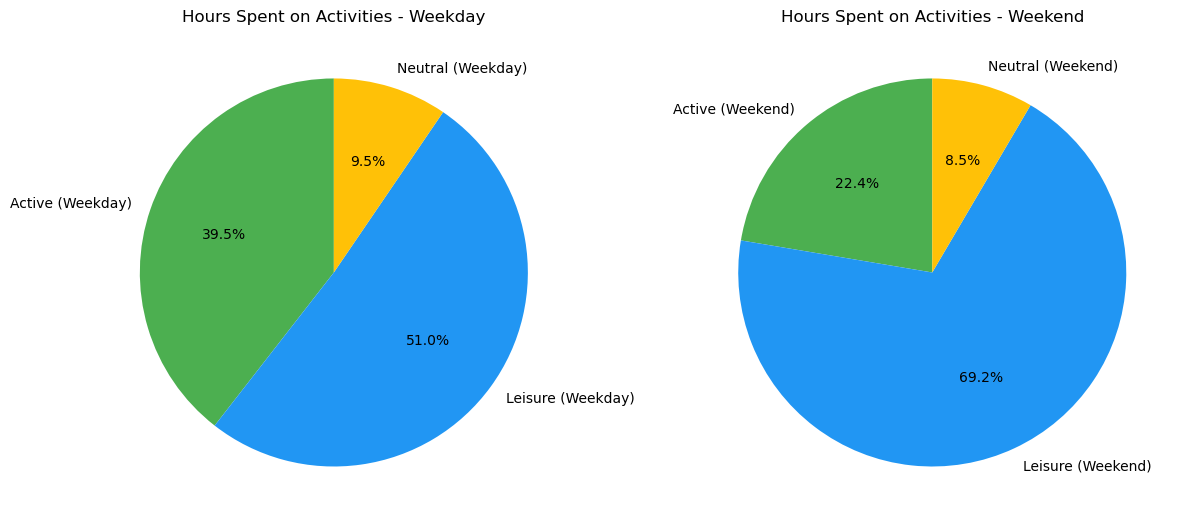

In [2]:
categories = ['Active_duration_weekday', 'Leisure_duration_weekday', 'Neutral_duration_weekday',
              'Active_duration_weekend', 'Leisure_duration_weekend', 'Neutral_duration_weekend']

# Calculate the total hours for each category
weekday_totals = df[['Active_duration_weekday', 'Leisure_duration_weekday', 'Neutral_duration_weekday']].sum()
weekend_totals = df[['Active_duration_weekend', 'Leisure_duration_weekend', 'Neutral_duration_weekend']].sum()

# Labels for the pie charts
labels_weekday = ['Active (Weekday)', 'Leisure (Weekday)', 'Neutral (Weekday)']
labels_weekend = ['Active (Weekend)', 'Leisure (Weekend)', 'Neutral (Weekend)']

# Colors for the pie charts
colors = ['#4CAF50', '#2196F3', '#FFC107']

# Plot weekday pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # First subplot for weekday
plt.pie(weekday_totals, labels=labels_weekday, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Hours Spent on Activities - Weekday')

# Plot weekend pie chart
plt.subplot(1, 2, 2)  # Second subplot for weekend
plt.pie(weekend_totals, labels=labels_weekend, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Hours Spent on Activities - Weekend')

# Display the plots
plt.tight_layout()
plt.show()

In [3]:
# Group the data by gender and calculate the mean for each category of activities
activity_means = df.groupby('Gender')[['Active_duration_weekday', 'Active_duration_weekend', 'Leisure_duration_weekday',
                                       'Leisure_duration_weekend', 'Neutral_duration_weekday', 'Neutral_duration_weekend']].mean()

# Display the results
print(activity_means)

        Active_duration_weekday  Active_duration_weekend  \
Gender                                                     
Female                 9.210526                 5.440789   
Male                   9.608844                 5.326531   

        Leisure_duration_weekday  Leisure_duration_weekend  \
Gender                                                       
Female                 12.322368                 16.559211   
Male                   12.200680                 16.629252   

        Neutral_duration_weekday  Neutral_duration_weekend  
Gender                                                      
Female                  2.467105                  2.000000  
Male                    2.190476                  2.044218  


In [4]:
import pandas as pd
from scipy.stats import ttest_ind


# Define the categories
categories = ['Active_duration_weekday', 'Leisure_duration_weekday', 'Neutral_duration_weekday',
              'Active_duration_weekend', 'Leisure_duration_weekend', 'Neutral_duration_weekend']

# Initialize a dictionary to store the results
t_test_results = {}

# Loop through each category and perform the T-test
for category in categories:
    female_data = df[df['Gender'] == 'Female'][category]
    male_data = df[df['Gender'] == 'Male'][category]
    
    # Perform the T-test
    t_stat, p_value = ttest_ind(female_data, male_data, equal_var=False)  # Assuming unequal variances
    
    # Store the result
    t_test_results[category] = {'t-statistic': t_stat, 'p-value': p_value}


t_test_df = pd.DataFrame(t_test_results).T


print(t_test_df)


                          t-statistic   p-value
Active_duration_weekday     -1.117750  0.265182
Leisure_duration_weekday     0.323689  0.746551
Neutral_duration_weekday     1.172100  0.242807
Active_duration_weekend      0.256001  0.798242
Leisure_duration_weekend    -0.141493  0.887643
Neutral_duration_weekend    -0.197567  0.843576


# average time spent by gender on active activities (weekend) and t-tests to check if differences between males and females are statistically significant.

In [6]:
# List of active activities
active_activities = [
    'University_Class_duration_weekend', 
    'Study_duration_weekend', 
    'Exercise_duration_weekend',
    'Work_duration_weekend', 
    'Housework_duration_weekend', 
    'Cooking_duration_weekend'
]

# Calculate the average time spent on each active activity by gender for weekdays and weekends
average_time_spent_active = df.groupby('Gender')[active_activities].mean()
print(average_time_spent_active)

# Perform t-tests for each active activity
from scipy.stats import ttest_ind

# Perform t-tests for each active activity
t_test_results_active = {}
for activity in active_activities:
    t_stat, p_value = ttest_ind(df[df['Gender'] == 'Male'][activity], df[df['Gender'] == 'Female'][activity])
    t_test_results_active[activity] = {'t-statistic': t_stat, 'p-value': p_value}


t_test_results_active_df = pd.DataFrame(t_test_results_active).T
print(t_test_results_active_df)


        University_Class_duration_weekend  Study_duration_weekend  \
Gender                                                              
Female                           0.381579                2.789474   
Male                             0.523810                3.030612   

        Exercise_duration_weekend  Work_duration_weekend  \
Gender                                                     
Female                   0.447368               0.572368   
Male                     0.428571               0.727891   

        Housework_duration_weekend  Cooking_duration_weekend  
Gender                                                        
Female                    0.953947                  0.296053  
Male                      0.568027                  0.047619  
                                   t-statistic   p-value
University_Class_duration_weekend     0.606398  0.544873
Study_duration_weekend                0.651401  0.515465
Exercise_duration_weekend            -0.168496  0.866347
Wo

# average time spent by gender on active activities (weekday) and t-tests to check if differences between males and females are statistically significant.

In [7]:
# List of active activities
active_activities = [
    'University_Class_duration_weekday', 
    'Study_duration_weekday', 
    'Exercise_duration_weekday',
    'Work_duration_weekday', 
    'Housework_duration_weekday', 
    'Cooking_duration_weekday'
]

# Calculate the average time spent on each active activity by gender for weekdays and weekends
average_time_spent_active = df.groupby('Gender')[active_activities].mean()
print(average_time_spent_active)

# Perform t-tests for each active activity
from scipy.stats import ttest_ind

# Perform t-tests for each active activity
t_test_results_active = {}
for activity in active_activities:
    t_stat, p_value = ttest_ind(df[df['Gender'] == 'Male'][activity], df[df['Gender'] == 'Female'][activity])
    t_test_results_active[activity] = {'t-statistic': t_stat, 'p-value': p_value}


t_test_results_active_df = pd.DataFrame(t_test_results_active).T
print(t_test_results_active_df)


        University_Class_duration_weekday  Study_duration_weekday  \
Gender                                                              
Female                           4.453947                2.625000   
Male                             4.234694                3.210884   

        Exercise_duration_weekday  Work_duration_weekday  \
Gender                                                     
Female                   0.302632               1.125000   
Male                     0.363946               1.394558   

        Housework_duration_weekday  Cooking_duration_weekday  
Gender                                                        
Female                    0.552632                  0.151316  
Male                      0.353741                  0.051020  
                                   t-statistic   p-value
University_Class_duration_weekday    -0.685624  0.493669
Study_duration_weekday                1.950441  0.052388
Exercise_duration_weekday             0.610116  0.542412
Wo

# average time spent by gender on Leisure activities (weekday) and t-tests to check if differences between males and females are statistically significant.

In [8]:
# List of leisure activities
leisure_activities = [
    'Sleeping_duration_weekday', 
    'Entertainment_duration_weekday', 
    'Eating_duration_weekday', 
    'Socializing_duration_weekday', 
    'Video_Games_duration_weekday', 
    'Religion_or_Spiritual_Activities_duration_weekday', 
    'Shopping_duration_weekday', 
    'Family_Time_duration_weekday', 
    'Sports_duration_weekday', 
    'Reading_or_Writing_duration_weekday', 
    'Nightlife_duration_weekday'
]

# Calculate the average time spent on each leisure activity by gender
average_time_spent_leisure = df.groupby('Gender')[leisure_activities].mean()
print(average_time_spent_leisure)


from scipy.stats import ttest_ind

# Perform t-tests for each leisure activity
t_test_results = {}
for activity in leisure_activities:
    t_stat, p_value = ttest_ind(df[df['Gender'] == 'Male'][activity], df[df['Gender'] == 'Female'][activity])
    t_test_results[activity] = {'t-statistic': t_stat, 'p-value': p_value}


t_test_results_df = pd.DataFrame(t_test_results).T
print(t_test_results_df)


        Sleeping_duration_weekday  Entertainment_duration_weekday  \
Gender                                                              
Female                   6.552632                        1.171053   
Male                     6.431973                        1.207483   

        Eating_duration_weekday  Socializing_duration_weekday  \
Gender                                                          
Female                 1.552632                      0.848684   
Male                   1.278912                      0.680272   

        Video_Games_duration_weekday  \
Gender                                 
Female                      0.269737   
Male                        0.778912   

        Religion_or_Spiritual_Activities_duration_weekday  \
Gender                                                      
Female                                           0.809211   
Male                                             0.727891   

        Shopping_duration_weekday  Family_Time_duration_

# average time spent by gender on Leisure activities (weekend) and t-tests to check if differences between males and females are statistically significant.

In [10]:
# List of weekend leisure activities
weekend_leisure_activities = [
    'Sleeping_duration_weekend', 
    'Entertainment_duration_weekend', 
    'Eating_duration_weekend', 
    'Socializing_duration_weekend', 
    'Video_Games_duration_weekend', 
    'Religion_or_Spiritual_Activities_duration_weekend', 
    'Shopping_duration_weekend', 
    'Family_Time_duration_weekend', 
    'Sports_duration_weekend', 
    'Reading_or_Writing_duration_weekend', 
    'Nightlife_duration_weekend'
]

# Calculate the average time spent on each leisure activity by gender for the weekend
average_time_spent_leisure_weekend = df.groupby('Gender')[weekend_leisure_activities].mean()
print(average_time_spent_leisure_weekend)

# Perform t-tests for each weekend leisure activity
t_test_results_weekend = {}
for activity in weekend_leisure_activities:
    t_stat, p_value = ttest_ind(df[df['Gender'] == 'Male'][activity], df[df['Gender'] == 'Female'][activity])
    t_test_results_weekend[activity] = {'t-statistic': t_stat, 'p-value': p_value}


t_test_results_weekend_df = pd.DataFrame(t_test_results_weekend).T
print(t_test_results_weekend_df)


        Sleeping_duration_weekend  Entertainment_duration_weekend  \
Gender                                                              
Female                   8.618421                        1.986842   
Male                     8.387755                        1.758503   

        Eating_duration_weekend  Socializing_duration_weekend  \
Gender                                                          
Female                 1.901316                      0.743421   
Male                   1.414966                      0.819728   

        Video_Games_duration_weekend  \
Gender                                 
Female                      0.250000   
Male                        1.068027   

        Religion_or_Spiritual_Activities_duration_weekend  \
Gender                                                      
Female                                           1.092105   
Male                                             1.170068   

        Shopping_duration_weekend  Family_Time_duration_

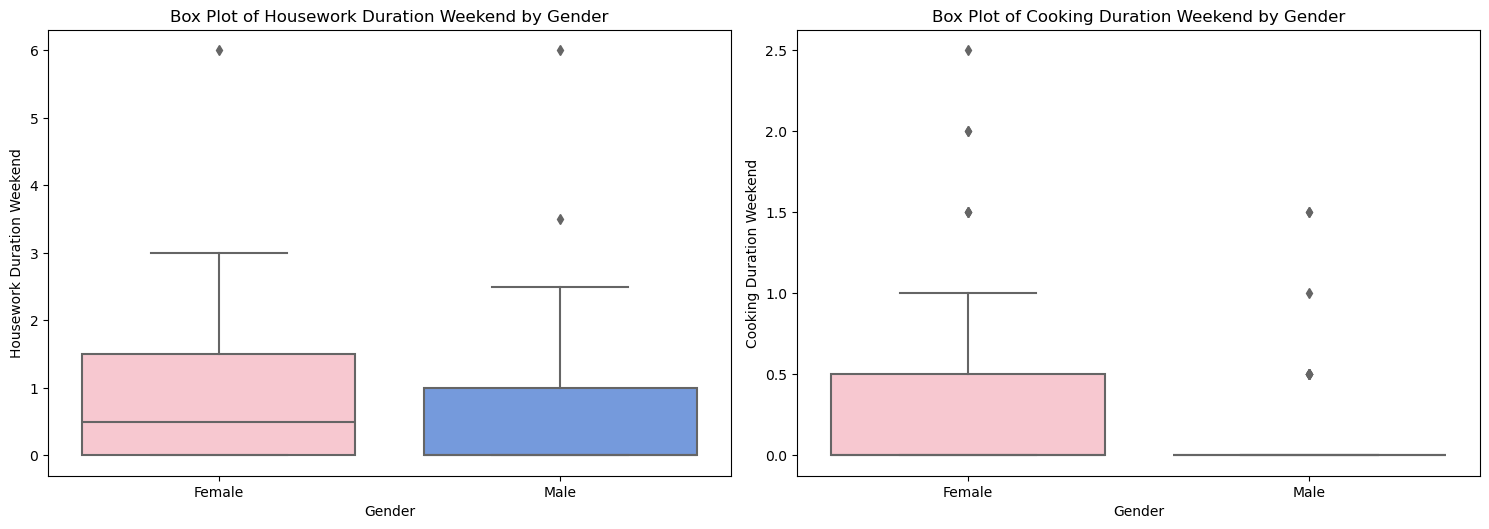

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Significant activities
significant_active_activities = [
    'Housework_duration_weekend', 
    'Cooking_duration_weekend'
]

# Set up the figure for multiple plots
plt.figure(figsize=(15, 10))

# Define a custom color palette for genders
gender_palette = {'Male': 'cornflowerblue', 'Female': 'pink'}

# Create box plots for each significant activity
for i, activity in enumerate(significant_active_activities, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Gender', y=activity, data=df, palette=gender_palette)
    plt.title(f'Box Plot of {activity.replace("_", " ").title()} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'{activity.replace("_", " ").title()}')

plt.tight_layout()
plt.show()


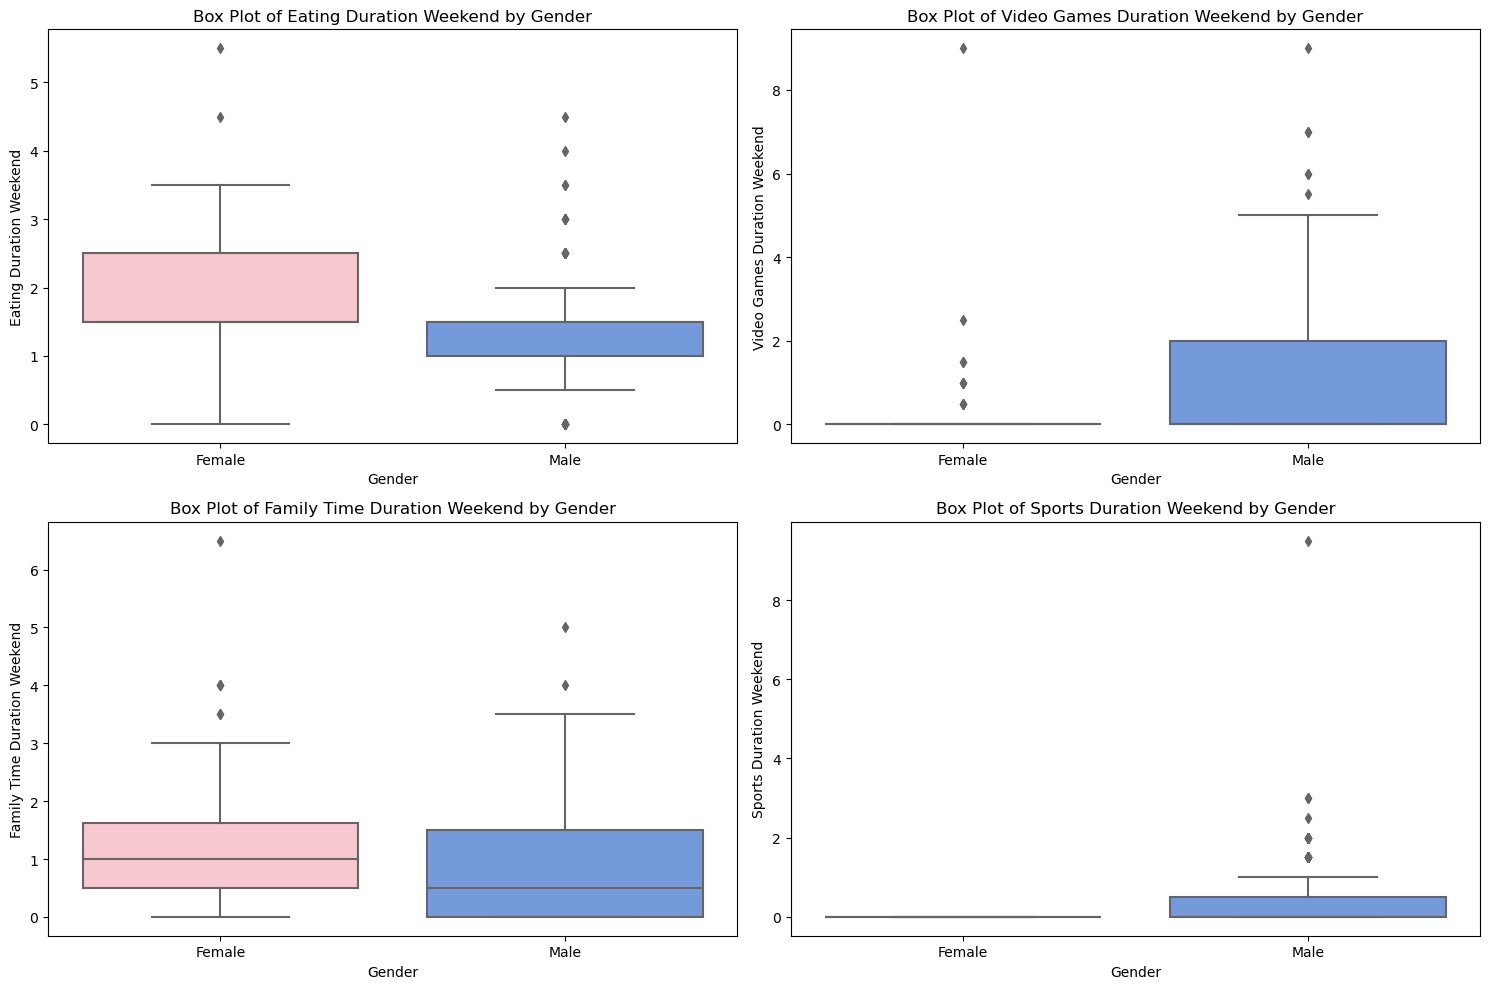

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Significant leisure activities
significant_leisure_activities = [
    'Eating_duration_weekend', 
    'Video_Games_duration_weekend', 
    'Family_Time_duration_weekend', 
    'Sports_duration_weekend'
]

# Set up the figure for multiple plots
plt.figure(figsize=(15, 10))

# Define a custom color palette for genders
gender_palette = {'Male': 'cornflowerblue', 'Female': 'pink'}

# Create box plots for each significant activity
for i, activity in enumerate(significant_leisure_activities, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Gender', y=activity, data=df, palette=gender_palette)
    plt.title(f'Box Plot of {activity.replace("_", " ").title()} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(f'{activity.replace("_", " ").title()}')

plt.tight_layout()
plt.show()
